<a href="https://colab.research.google.com/github/thinhtoohan/curvefitting/blob/main/curve_fitting_12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

## Data Initialization

In [51]:
X = np.array([0, 0.5, 1, 1.5, 1.9, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.6, 7, 7.6, 8.5, 9, 10])
y = np.array([1, 0.9, 0.7, 1.5, 2, 2.4, 3.2, 2, 2.7, 3.5, 1, 4, 3.6, 2.7, 5.7, 4.6, 6.0, 6.8, 7.3])

## Scatter Plot
From the scatter plot, we can see the upward trend in y as x increases.

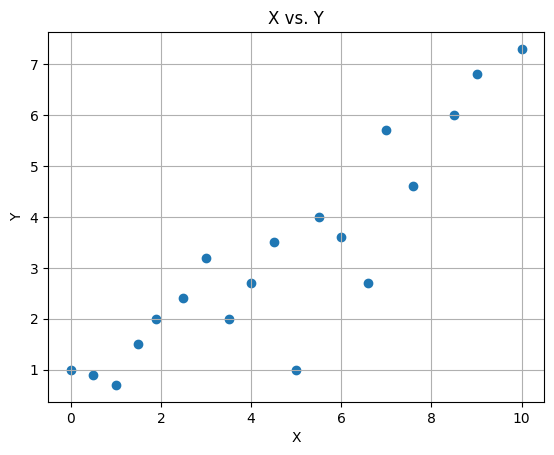

In [52]:
fig, ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y')
plt.grid()
plt.show()

## Linear Regression

In [53]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

Intercept and slope of the regression line are as follows.

In [54]:
print("Slope: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Slope:  [[0.61077172]]
Intercept:  [0.42612616]


## Polynomial Regression
We can fit a degree-2 polynomial to the data as well to see if it is more suited.

In [55]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,y)

LinearRegression()

In [56]:
print("Regression Coefficients: ", poly_reg_model.coef_)
print("Intercept: ", poly_reg_model.intercept_)

Regression Coefficients:  [0.16803115 0.04580581]
Intercept:  1.1036336950108052


## Plot with both fitted models

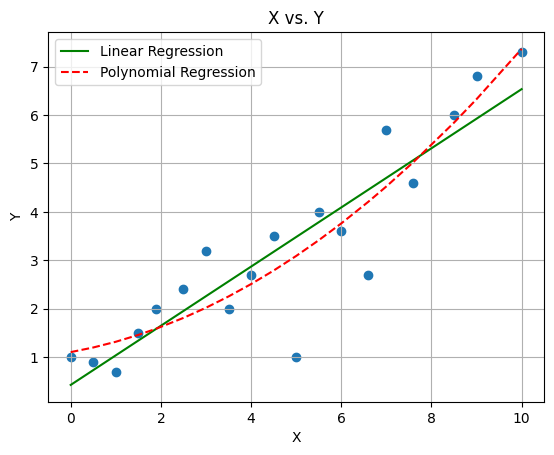

In [57]:
fig, ax = plt.subplots()

ax.scatter(X,y)

X_ = np.arange(0,11,0.5).reshape(-1,1)
ax.plot(X,((lr.coef_*X)+lr.intercept_).reshape(-1,1),"g-",label="Linear Regression")
y_predicted = poly_reg_model.predict(poly_features)
ax.plot(X,y_predicted,"r--",label="Polynomial Regression")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y')
ax.legend()
plt.grid()
plt.show()

## Linear Fit Minimizing Sum of Absolute Deviations

In [58]:
def lad(params, x, y):
    m, b = params
    y_pred = (m * x) + b
    return np.sum(np.absolute(y - y_pred))

def linear_regression_minimization(x, y):
    initial_guess = [0, 0]

    # Minimize the MSE function
    result = minimize(lad, initial_guess, args=(x, y),tol=1e-5,method='Nelder-Mead')

    if result.success:
        return result.x  # Returns [m, b]
    else:
        raise RuntimeError("Minimization did not converge")

m, b = linear_regression_minimization(X, y)
print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")

Slope (m): 0.6375
Intercept (b): 0.5812


## Linear Fit Minimizing Maximum Absolute Deviation

In [59]:
def max_deviation(params, x, y):
    m, b = params
    y_pred = (m * x) + b
    return np.max(np.absolute(y - y_pred))  # Max absolute deviation

def linear_regression_minimization_max_deviation(x, y):
    initial_guess = [0, 0]

    # Minimize the maximum deviation function
    result = minimize(
        max_deviation,
        initial_guess,
        args=(x,y),
        tol=1e-5,
        method='Nelder-Mead'
    )

    if result.success:
        return result.x  # Returns [m, b]
    else:
        raise RuntimeError(f"Minimization did not converge: {result.message}")


m, b = linear_regression_minimization_max_deviation(X, y)
print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")

Slope (m): 0.6250
Intercept (b): -0.4000


## Polynomial Fit Minimizing Sum of Absolute Deviations

In [60]:
def poly_lad(params, x, y):
    b_1, b_2, b_3 = params
    y_pred = b_1 * x**2 + b_2 * x + b_3
    return np.sum(np.absolute(y - y_pred))

def polynomial_regression_minimization(x, y):
    initial_guess = [0, 0, 0]

    # Minimize the MSE function
    result = minimize(poly_lad, initial_guess, args=(x, y),method='SLSQP')

    if result.success:
        return result.x  # Returns [m, b]
    else:
        raise RuntimeError("Minimization did not converge")

b_1,b_2,b_3 = polynomial_regression_minimization(X, y)
print(f"Coefficient (a): {b_1:.4f}")
print(f"Coefficient (b): {b_2:.4f}")
print(f"Intercept (c): {b_3:.4f}")

Coefficient (a): 0.0348
Coefficient (b): 0.2887
Intercept (c): 0.9885


## Polynomial Fit Minimizing Maximum Absolute Deviation

In [61]:
def poly_max_deviation(params, x, y):
    b_1, b_2, b_3 = params
    y_pred = b_1 * x**2 + b_2 * x + b_3
    return np.max(np.absolute(y - y_pred))  # Max absolute deviation

def polynomial_regression_minimization_max_deviation(x, y):

    initial_guess = [0, 0, 0]

    # Minimize the maximum deviation function
    result = minimize(
        poly_max_deviation,
        initial_guess,
        args=(x,y),
        method='SLSQP'
    )

    if result.success:
        return result.x
    else:
        raise RuntimeError(f"Minimization did not converge: {result.message}")


b_1, b_2, b_3 = polynomial_regression_minimization_max_deviation(X, y)
print(f"Coefficient (a): {b_1:.4f}")
print(f"Coefficient (b): {b_2:.4f}")
print(f"Intercept (c): {b_3:.4f}")

Coefficient (a): 0.1260
Coefficient (b): -0.6301
Intercept (c): 2.4781


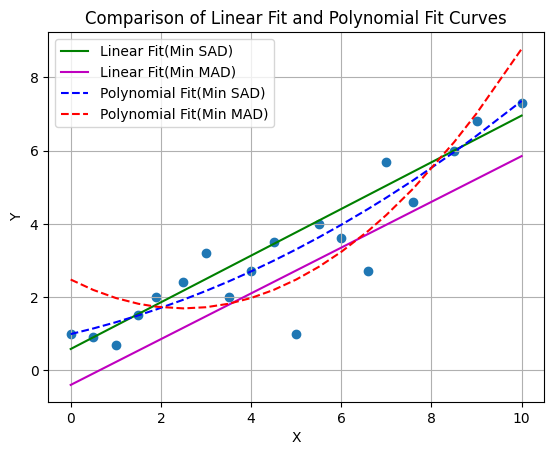

In [62]:
fig, ax = plt.subplots()

ax.scatter(X,y)

X_ = np.arange(0,11,0.5).reshape(-1,1)

ax.plot(X,((0.6375*X)+0.5812).reshape(-1,1),"g-",label="Linear Fit(Min SAD)")
ax.plot(X,((0.625*X)-0.4).reshape(-1,1),"m-",label="Linear Fit(Min MAD)")
ax.plot(X,((0.0348*(X**2))+(0.2887*X)+0.9885).reshape(-1,1),"b--",label="Polynomial Fit(Min SAD)")
ax.plot(X,((0.126*(X**2))-(0.6301*X)+2.4781).reshape(-1,1),"r--",label="Polynomial Fit(Min MAD)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y')
ax.legend()
plt.title("Comparison of Linear Fit and Polynomial Fit Curves")
plt.grid()
plt.show()